# **NFL BETTING MODEL PROJECT**

BY **AASHRITH IYER** AND **SHRAAVAN KANDIAKOUNDER**



# INTRODUCTION

For those who aren't familiar with the gambling scene, betting is incredibly challenging. Some consider it a waste of money, but honestly, the predictive arts of gambling are incredibly nuanced.

In life, you may have noticed that people love to abide by trends. Every morning, it's going to be a safe bet that we will brush our teeth, and for some people (like ourselves), it's a pretty safe bet that we shower as well. Sports is no different, teams that play at home are statistically more likely to win than teams on the road, but that's not to say that you should always back the home team regardless of the situation. There are so many other factors as to why you should choose a team; like who has the better record, or who has won more games consecutively, or who has the head to head advantage.

In short, making an educated decision on who to place money on is an important step in the art of gambling, and automating this is a goal that the two of us have had for a long time.

By using a dataset we found provided by the popular website Kaggle (https://www.kaggle.com/datasets/tobycrabtree/nfl-scores-and-betting-data), we have an immense amount of data, ranging from overall records to how they fare against the spread.

As a quick aside, if you are reading this tutorial, you likely know what the spread refers to, but "the spread" is a popular gambling concept that is meant to even the playing field between two teams. Think of it as an advantage for a weaker team. It answers the hypothetical: "What would happen if ______ got a head start, would they still win?"

The goal of this project is to curate a variety of factors, and help find a way to make betting easier. We're going to focus on whether a team at home can beat a team on the road, as this is normally the place that people start betting, and use other variables, (such as those aforementioned) to fine tune your decision to make sure that you are betting on the right team.  

# CONTRIBUTIONS

A: Project idea
- Aashrith and Shraavan both have a vested interest in football, and they both chose to incorporate a gambling interest with a data science angle for this project.

B: Dataset Curation and Preprocessing
- Aashrith focused on cleaning up and reformating the data, and Shraavan focused on adding the filtration for neutral site games, and making sure the spreads were adjusted. Aashrith filled out the summary blurb, which Shraavan edited afterwards.

C: Data Exploration and Summary Statistics
- Aashrith and Shraavan both used previous homeworks to generate a variety of summary statistics to gain insights on their model through.

D: ML Algorithm Design/Development
- Shraavan used the previous homeworks as a basis to help him design and implement a logistic regression model to train our data, to provide further insights.

E: ML Algorithm Training and Test Data Analysis

- Aashrith implemented a train/test split, as discussed in class, to properly train our data on one set, and test on another to avoid generalization.


F: Visualization, Result Analysis, Conclusion
- Shraavan added detailed visuals for the ROC curve, the confusion matrix, and the model of confidence. Aashrith analyzed these models, wrote blurbs for them, as well as wrote the conclusion.


G: Final Tutorial Report Creation

- Both worked at the same time to curate the final report, and create a presentable project.

# REQUIRED COMPONENTS

So we used

- python (https://docs.python.org/3/)
- pandas (https://pandas.pydata.org/docs/)
- numpy (https://numpy.org/doc/)
- colab
- seaborn
- matplot
- scipy

A basic understanding of pandas and numpy are needed to understand this tutorial, so please refer to the documentation listed for more information.

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, auc
uploaded = files.upload()

Saving nfl_teams.csv to nfl_teams.csv
Saving spreadspoke_scores.csv to spreadspoke_scores.csv


# DATA COLLECTION

This dataset is incredibly large. For starters, in our first file, we have the entire list of NFL teams, and what conference and division they are currently in, as well as the one they used to be in. The next file is where the magic happens, as this is where we have the scores and the favorites, basically all the information we can use to make informed betting decisions.


In [2]:
# here, we are reading both the data files
teams_df = pd.read_csv('nfl_teams.csv')
scores_df = pd.read_csv('spreadspoke_scores.csv')

print("NFL Teams Data:")
print(teams_df.head())

print("\nGame Scores Data:")
print(scores_df.head())

NFL Teams Data:
           team_name team_name_short team_id team_id_pfr team_conference  \
0  Arizona Cardinals       Cardinals     ARI         CRD             NFC   
1    Atlanta Falcons         Falcons     ATL         ATL             NFC   
2    Baltimore Colts           Colts     IND         CLT             AFC   
3   Baltimore Ravens          Ravens     BAL         RAV             AFC   
4    Boston Patriots        Patriots      NE         NWE             AFC   

  team_division team_conference_pre2002 team_division_pre2002  
0      NFC West                     NFC              NFC West  
1     NFC South                     NFC              NFC West  
2           NaN                     AFC              AFC East  
3     AFC North                     AFC           AFC Central  
4           NaN                     AFC                   NaN  

Game Scores Data:
  schedule_date  schedule_season schedule_week  schedule_playoff  \
0      9/2/1966             1966             1          

Next, we know that because of the sheer volume of data that we have, we are bound to encounter NULL values. For example, games before the 1980's do not have a favorite column, so they need to go, as there is no benefit for us not knowing the favorite.

In [3]:
# simple cleaning up of NA and NULL values
teams_df = teams_df.dropna()
scores_df = scores_df.drop(columns=['weather_temperature', 'weather_wind_mph', 'weather_humidity', 'weather_detail'])
print("NFL Teams Data:")
print(teams_df.head())
print("\nGame Scores Data:")
print(scores_df.head())

NFL Teams Data:
           team_name team_name_short team_id team_id_pfr team_conference  \
0  Arizona Cardinals       Cardinals     ARI         CRD             NFC   
1    Atlanta Falcons         Falcons     ATL         ATL             NFC   
3   Baltimore Ravens          Ravens     BAL         RAV             AFC   
5      Buffalo Bills           Bills     BUF         BUF             AFC   
6  Carolina Panthers        Panthers     CAR         CAR             NFC   

  team_division team_conference_pre2002 team_division_pre2002  
0      NFC West                     NFC              NFC West  
1     NFC South                     NFC              NFC West  
3     AFC North                     AFC           AFC Central  
5      AFC East                     AFC              AFC East  
6     NFC South                     NFC              NFC West  

Game Scores Data:
  schedule_date  schedule_season schedule_week  schedule_playoff  \
0      9/2/1966             1966             1          

We also know that because we are focusing on whether home teams will win versus away teams, those games with neutral sites have no impact. This means that we can realt get rid of all games with a neutral site, and we have done this below!

In [4]:
# dropped games where it was a neutral site because home and away have no impact.
# this means that super bowls will not be recorded.
scores_df = scores_df[scores_df['stadium_neutral'] != True]
display(scores_df)
scores_df.dropna()
print("NFL Teams Data:")
print(teams_df.head())
print("\nGame Scores Data:")
print(scores_df.head())

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral
0,9/2/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False
1,9/3/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False
2,9/4/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False
3,9/9/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False
4,9/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14080,1/18/2025,2024,Division,True,Kansas City Chiefs,23,14,Houston Texans,KC,-9.5,41.5,GEHA Field at Arrowhead Stadium,False
14081,1/19/2025,2024,Division,True,Buffalo Bills,27,25,Baltimore Ravens,BAL,-1.5,52,Highmark Stadium,False
14082,1/19/2025,2024,Division,True,Philadelphia Eagles,28,22,Los Angeles Rams,PHI,-7.0,43.5,Lincoln Financial Field,False
14083,1/26/2025,2024,Conference,True,Philadelphia Eagles,55,23,Washington Commanders,PHI,-6.0,47,Lincoln Financial Field,False


NFL Teams Data:
           team_name team_name_short team_id team_id_pfr team_conference  \
0  Arizona Cardinals       Cardinals     ARI         CRD             NFC   
1    Atlanta Falcons         Falcons     ATL         ATL             NFC   
3   Baltimore Ravens          Ravens     BAL         RAV             AFC   
5      Buffalo Bills           Bills     BUF         BUF             AFC   
6  Carolina Panthers        Panthers     CAR         CAR             NFC   

  team_division team_conference_pre2002 team_division_pre2002  
0      NFC West                     NFC              NFC West  
1     NFC South                     NFC              NFC West  
3     AFC North                     AFC           AFC Central  
5      AFC East                     AFC              AFC East  
6     NFC South                     NFC              NFC West  

Game Scores Data:
  schedule_date  schedule_season schedule_week  schedule_playoff  \
0      9/2/1966             1966             1          

Finally, some basic formatting has got to be done with the data so we can extract it and use it properly. At the end of the day, we have to be able to use the data we have in the database, and a lot of the dates and such aren't perfect! We convert all the data to the same format, and then columnize it!

In [5]:
# converting all the dates to the same format
scores_df['schedule_date'] = pd.to_datetime(scores_df['schedule_date'])

print("\nGame Scores Data:")
print(scores_df.head())

# columnizing the data
numeric_cols = ['score_home', 'score_away', 'spread_favorite', 'over_under_line']
scores_df[numeric_cols] = scores_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce')

print(scores_df.isnull().sum())


Game Scores Data:
  schedule_date  schedule_season schedule_week  schedule_playoff  \
0    1966-09-02             1966             1             False   
1    1966-09-03             1966             1             False   
2    1966-09-04             1966             1             False   
3    1966-09-09             1966             2             False   
4    1966-09-10             1966             1             False   

            team_home  score_home  score_away        team_away  \
0      Miami Dolphins          14          23  Oakland Raiders   
1      Houston Oilers          45           7   Denver Broncos   
2  San Diego Chargers          27           7    Buffalo Bills   
3      Miami Dolphins          14          19    New York Jets   
4   Green Bay Packers          24           3  Baltimore Colts   

  team_favorite_id  spread_favorite over_under_line         stadium  \
0              NaN              NaN             NaN     Orange Bowl   
1              NaN              N

# EXPLORATORY DATA ANALYSIS (EDA)

For our first plot, we decided a histogram depicting a comparison between teams scoring at home vs scoring away. Obviously, if we can get a measure of how many points teams are scoring at home versus how many they are scoring on the road, it can give us a better gauge as to how to bet on these teams. As you can see, we used **blue** for home and **red** for away.

Teams Data Shape: (34, 8)
Scores Data Shape: (13963, 13)

Scores Data Summary:
                       schedule_date  schedule_season    score_home  \
count                          13963     13963.000000  13963.000000   
mean   1997-12-18 15:55:17.424622208      1997.118169     22.508200   
min              1966-09-02 00:00:00      1966.000000      0.000000   
25%              1983-11-22 12:00:00      1983.000000     15.000000   
50%              1998-11-29 00:00:00      1998.000000     22.000000   
75%              2012-01-07 12:00:00      2011.000000     30.000000   
max              2025-01-26 00:00:00      2024.000000     72.000000   
std                              NaN        16.693052     10.515062   

         score_away  spread_favorite  over_under_line  
count  13963.000000     11485.000000     11414.000000  
mean      19.819523        -5.360122        42.311871  
min        0.000000       -26.500000        28.000000  
25%       13.000000        -7.000000        39.000000  
5

<ipython-input-6-e4430ed78ce4>:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Location')


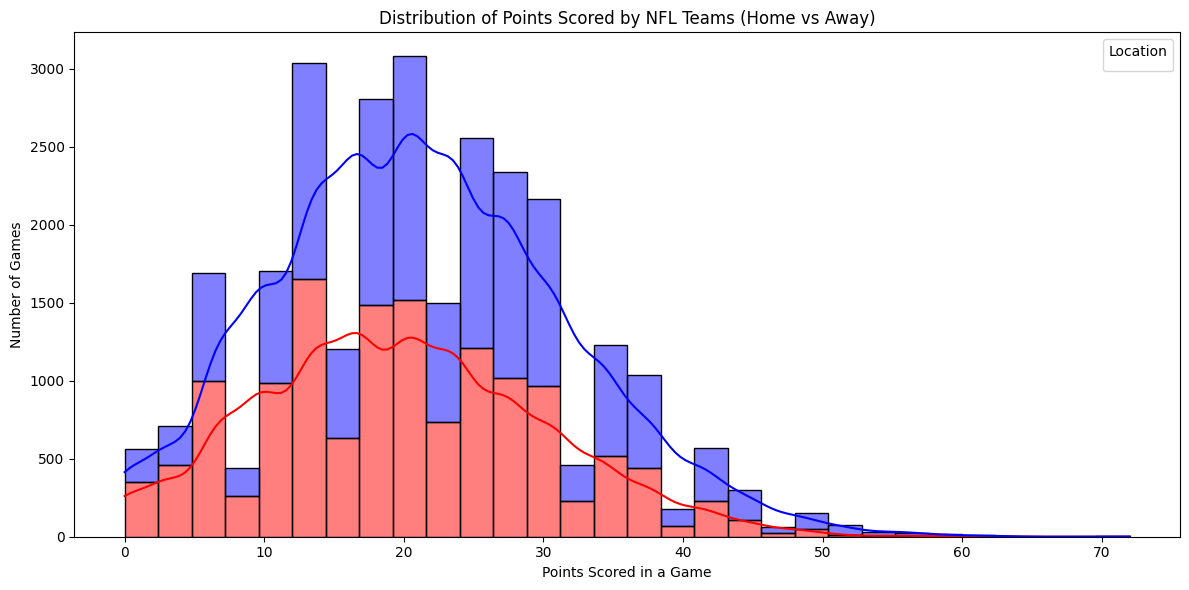

In [6]:
print("Teams Data Shape:", teams_df.shape)
print("Scores Data Shape:", scores_df.shape)

print("\nScores Data Summary:")
print(scores_df.describe())


# First plot -> here we are comparing teams scoring at home versus teams scoring away. This,
# in addition to our hypothesis testing, can allow us to make informed judgements on who
# to bet on depending on where they are playing.

# Create long-form DataFrame with 'team', 'points', and 'location'
home_scores = scores_df[['team_home', 'score_home']].copy()
home_scores.columns = ['team', 'points']
home_scores['location'] = 'Home'

away_scores = scores_df[['team_away', 'score_away']].copy()
away_scores.columns = ['team', 'points']
away_scores['location'] = 'Away'

# Combine into one DataFrame
team_scores = pd.concat([home_scores, away_scores], ignore_index=True)

# Plot histogram comparing points scored at home vs away
plt.figure(figsize=(12, 6))
sns.histplot(data=team_scores, x='points', hue='location', kde = True, bins=30, palette={'Home': 'blue', 'Away': 'red'}, multiple='stack')
plt.title('Distribution of Points Scored by NFL Teams (Home vs Away)')
plt.xlabel('Points Scored in a Game')
plt.ylabel('Number of Games')
plt.legend(title='Location')
plt.tight_layout()
plt.show()

Our second plot is incredibly important, as it describes the difference between the spread and the actual score. This gives us a gauge as to how strong favorites and strong underdogs do, and also gives us some more inclination as to how to bet these games.

For example, maybe a team that is favored by 15 should be ignored in most cases, as it doesn't seem like those teams cover the spread very often. However, when you are favored by 7, you cover the spread quite often, so I can consider betting that team!

It's all about understanding trends, and taking advantage of any possible information.

For this, we have also calculated the score difference, and fixed the spread using a helper function.

In [ ]:
# Second Plot -> We are comparing Spread versus Score Difference
# The Spread relates to the betting line, so what the oddsmakers thought the score would be
# We have plotted a scatter plot comparing what the oddsmaker thought the score would be to what
# the score actually was
team_abbreviation_to_name = dict(zip(teams_df['team_id'], teams_df['team_name']))


# Calculate score difference (home - away)
scores_df['score_diff'] = scores_df['score_home'] - scores_df['score_away']

# remove ties for sake of study
scores_df = scores_df[scores_df['score_diff'] != 0]

# the dataset has every spread set to negative. If the home team is favored, it stays at negative. Otherwise, we modify it to make it positive.
def fix_spread(row):
    if row['team_favorite_id'] in team_abbreviation_to_name:
        if team_abbreviation_to_name[row['team_favorite_id']] == row['team_away']:
            return abs(row['spread_favorite'])
    return row['spread_favorite']

scores_df['spread_favorite'] = scores_df.apply(fix_spread, axis=1)

sns.scatterplot(x = 'spread_favorite', y = 'score_diff', data = scores_df, alpha = 0.6)
plt.axhline(0, color = 'black')
plt.title('Spread vs. Actual Score Difference')
plt.xlabel('Spread Favorite')
plt.ylabel('Actual Score Difference (Home - Away)')
plt.show()

Now, we move on to our hypothesis test. I think the most important thing for us to know in this space would be if home teams scored more, so we ran our test on this. Of course, the fundemental basis of our project is if home teams scored more than away teams, and if we should bet on this, so we ran a test as such.

In [8]:
# Hypothesis Test -> It would be helpful to know if home teams scored more, as
# it would give us a better indication on what to bet on.
# If home teams are scoring more then when they are away, we can compare the points
# and choose whether or not to bet on these specific teams.

t_stat, p_value = ttest_ind(scores_df['score_home'], scores_df['score_away'])
print(f"\nHypothesis Test: Do Home Teams Score More Than Road Teams?")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")


if p_value < 0.05:
    print("Home teams tend to score more.")
else:
    print("We see no significant difference, can't reject the null hypothesis")


Hypothesis Test: Do Home Teams Score More Than Road Teams?
T-statistic: 21.796, P-value: 0.000
Home teams tend to score more.


As you can see by the results of the tests, we achieved a P value lower than
0.05, meaning that home teams do end up scoring more. We can confirm the hypothesis we had the whole time, and this is incredibly helpful for us so far.

As a quick recap of that section, we tested to see how much teams score at home versus how much they score away, how much teams who are favored at home/away win by compared to how much they are projected to win by, and then we tested to make sure our findings aligned with the data. Truthfully, these conclusions aligned with our pre-existing beliefs, but it is nice to know that our hypotheses are founded on data and not just conjecture.

# PRIMARY ANALYSIS

Now we are moving on to our primary analysis section, where we can see if everything we have done so far is working, and if we can make any conclusions about our data.

We first have to prep our data a little, so we want to make sure that there are no columns where NaN is a value. We want all our wins to be above 0 in our home wins column, because we shouldn't take into account losses here, and a negative value would just be bad.

In [ ]:
# Drop rows where any of the feature columns or the target are NaN
scores_df.loc[:, 'home_win'] = (scores_df['score_diff'] > 0).astype(int)

features = ['spread_favorite', 'over_under_line', 'home_win']
clean_df = scores_df[features].dropna()  # Drop NaNs from both features and target together

Now that our data is clean and ready, let's begin building a simple logistic regression model, to see whether a home team wins a game or not.

The best way to do this is to use the two features spread_favorite and over_under_line to measure out the predicted total score, and who the favorite is.

We start by doing a stratified split, which allows us to see a fair mix of wins and losses in both training and testing. We also use standard scaler to scale the data, helping the model learn better.

Once the model is trained, we use it to predict probabilities instead of just 0 or 1—this lets us evaluate how confident the model is and helps us plot metrics like the ROC curve later on.

In [10]:
# Now separate features and target
X = clean_df[['spread_favorite', 'over_under_line']]
y = clean_df['home_win']

# Perform stratified split to ensure both classes are present in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
# Scale features again
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression and get predicted probabilities
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_probs = model.predict_proba(X_test_scaled)[:, 1]
display(y_probs)
y_pred = model.predict(X_test_scaled)

array([0.90011332, 0.27644103, 0.41508793, ..., 0.71559413, 0.26477277,
       0.67385869])

Here, we print out the confusion matrix, which shows us that our model could use some work.

Keep in mind, this is a predictive algorithm for sports betting, so anything above 50% is honestly incredibly successful, but the model correctly predicted 2 out of 9 home losses, and 11 out of 15 home wins. Basically, it can really predict home wins, but it's having trouble predicting some home losses.

Again, it's only struggling with home losses as shown by the classification report, but in general, predictive algorithms struggle at home losses in general.

As an aside for those interested, the most popular betting strategy for home away losses is only betting the underdog, and if you net a loss, you double down and bet the underdog again. If this is the best strategy available, we genuinely think this model is great.

              precision    recall  f1-score   support

           0       0.61      0.45      0.52       966
           1       0.66      0.79      0.72      1312

    accuracy                           0.64      2278
   macro avg       0.63      0.62      0.62      2278
weighted avg       0.64      0.64      0.63      2278



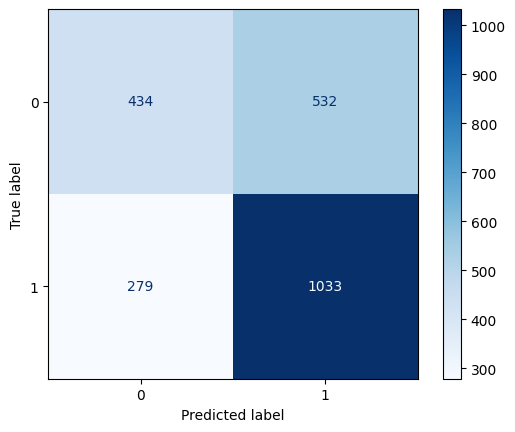

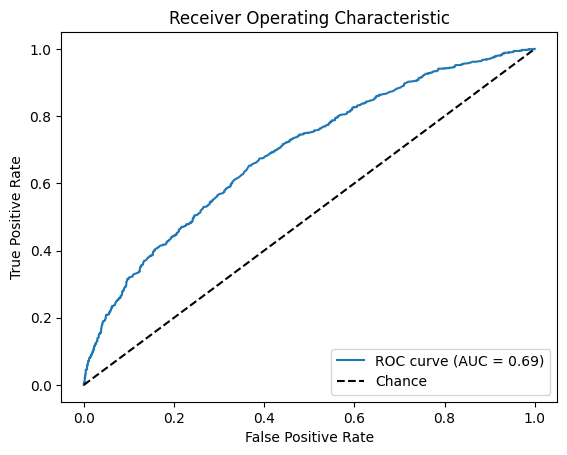

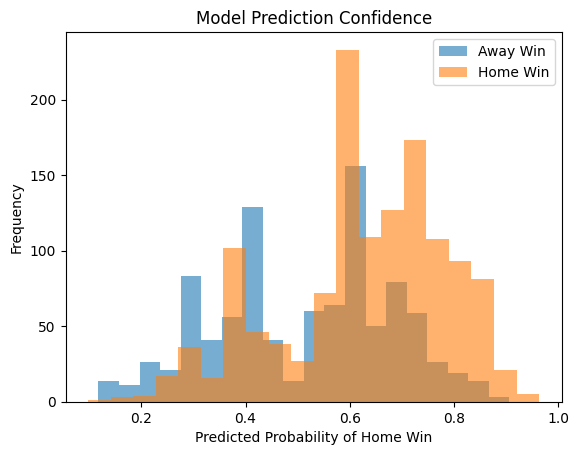

           Feature  Coefficient
0  spread_favorite    -0.773744
1  over_under_line    -0.005107


In [11]:
# Evaluate
cm = confusion_matrix(y_test, y_pred)
display_feature = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display_feature.plot(cmap="Blues")
print(classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

plt.hist(y_prob[y_test == 0], bins=20, alpha=0.6, label="Away Win")
plt.hist(y_prob[y_test == 1], bins=20, alpha=0.6, label="Home Win")
plt.xlabel("Predicted Probability of Home Win")
plt.ylabel("Frequency")
plt.legend()
plt.title("Model Prediction Confidence")
plt.show()

coefs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})
print(coefs)

The feature coefficients are important to look at as well.

A negative coefficient for spread_favorite implies that as the favorite team’s spread increases (meaning the home team is expected to win by more), the probability of an actual home win decreases.

A positive coefficient for over_under_line (though small) suggests that higher-scoring games slightly increase the likelihood of a home win, but its impact is weak compared to the spread.

We added an ROC curve, with an AOC above 0.5, which means that our model is generally much better than randomly selecting a result. It indicates that there is some room for improvement, but we also know that with time and more data, our model will train to maybe reach the 0.8 to 0.9 range. All in all, it's a fantastic way to see whether a team at home is going to win.

We also added a graphic for how confident we are in our model. If you look at the graphic, we are incredibly confident in our ability to predict home wins, with high frequencies at every predicted probability, obviously going higher and higher as the probabilities increase. Our home losses, or away wins, is not bad either. Obviously, we aren't perfect, but the ability to consistently predict at least 60% of our away wins is something that we know will generate us more wins in our betting predictions.

# VISUALIZATION

The easiest way to visualize the model's output would be to plot the predicted probability from the model for each game in our test set. Each game is marked by wins (1) and losses (0). This lets us assess how confident the model is in its predictions and whether higher probabilities actually correspond to home team wins.

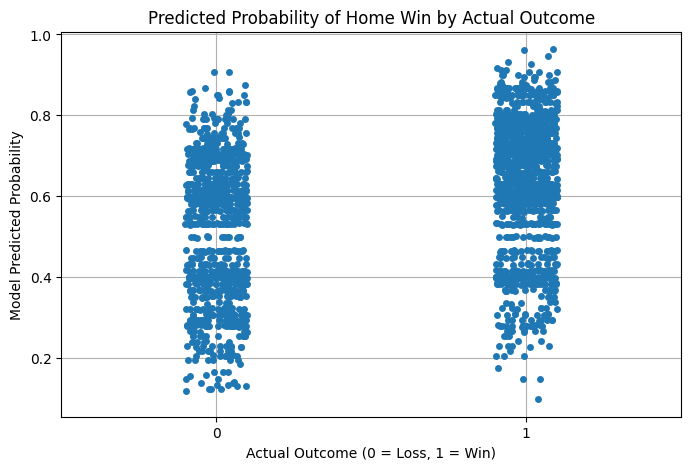

In [12]:
pred_df = pd.DataFrame({
    'Predicted Probability': y_probs,
    'Actual Outcome': y_test.reset_index(drop = True)
})

plt.figure(figsize=(8, 5))
sns.stripplot(data=pred_df, x = 'Actual Outcome', y = 'Predicted Probability', jitter = True)
plt.title('Predicted Probability of Home Win by Actual Outcome')
plt.xlabel('Actual Outcome (0 = Loss, 1 = Win)')
plt.ylabel('Model Predicted Probability')
plt.grid(True)
plt.show()


# CONCLUSION

This project was really two people who love sports coming together to try and make more informed betting decisions. Betting drives the sporting market right now, so rather than straying away from it, we wanted to find a way to make it more responsible.

Through exploratory data analysis, we observed that home teams tend to score slightly more points than away teams, and our hypothesis test showed that the difference is statistically significant — meaning we can confidently claim that home advantage translates to higher scoring on average.

Moving onto predictive modeling, we showed that through the limited amount of features we were given access to in this database, we were able to achieve a pretty reasonable classification performance, and we were able to predict a really large amount of home wins, and a fair amount of home losses too. Again, we weren't competing with much in the betting prediction area, but something as good as this will allow us to make at least slightly more informed decisions going forward.

Using a plot, we were able to visualize how the predicted probabilities related to the actual outcomes. We matched predicted wins and losses to actual wins and losses, and this helped us build the model out, and interpret its strengths and weaknesses.

Ultimately, while this was a project for a grade, this is something we plan to keep fine tuning for the future to really enhance our sports watching experience. Football is a big part of our lives, and anything that can give us an advantage in the sports betting scene, and allow us to make informed decisions with our money, is something that we will work on for sure.